In [12]:
from kineticlib import particles, loaddata, ratesvibr, ratesdiss
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

In [2]:
%matplotlib inline

In [3]:
N2 = particles.Molecule('N2')
N2h = particles.Molecule('N2', 'harmonic')
N = particles.Atom('N')

id_N2N2 = loaddata.load_elastic_parameters(N2, N2)
id_N2N = loaddata.load_elastic_parameters(N2, N)

dd_N2N2 = loaddata.load_dissociation_parameters(N2, N2)
dd_N2N = loaddata.load_dissociation_parameters(N2, N)

In [4]:
def ssh_rates(T_s, step_size, steps, idd, mol, level, delta):
    res = np.zeros(steps)
    for i in range(steps):
        res[i] = ratesvibr.vt_rate_ssh(T_s + step_size * i, idd, mol, level, delta)
    return res

In [5]:
def fho_rates(T_s, step_size, steps, idd, mol, level, delta):
    res = np.zeros(steps)
    for i in range(steps):
        res[i] = ratesvibr.vt_rate_fho(T_s + step_size * i, idd, mol, level, delta, model='VSS')
    return res

In [6]:
def fho_rates_vv(T_s, step_size, steps, idd, mol, level1, level2, delta):
    res = np.zeros(steps)
    for i in range(steps):
        res[i] = ratesvibr.vv_rate_fho(T_s + step_size * i, idd, mol, mol, level1, level2, delta)
    return res

In [7]:
def diss_rates_T_TM(T_s, step_size, steps, ddata, mol, level, modl):
    res = np.zeros(steps)
    for i in range(steps):
        res[i] = ratesdiss.diss_rate_treanor_marrone_sts(T_s + step_size * i, ddata, mol, level, modl)
    return res

In [8]:
def diss_rates_i_TM(T, ddata, mol, modl):
    res = np.zeros(mol.num_vibr+1)
    for i in range(mol.num_vibr+1):
        res[i] = ratesdiss.diss_rate_treanor_marrone_sts(T, ddata, mol, i, modl)
    return res

In [9]:
def diss_rates_T_integral(T_s, step_size, steps, idd, mol, level, modl):
    res = np.zeros(steps)
    for i in range(steps):
        res[i] = ratesdiss.diss_rate_integral_sts(T_s + step_size * i, idd, mol, level, model=modl)
    return res

In [10]:
def diss_rates_i_integral(T, idd, mol, modl):
    res = np.zeros(mol.num_vibr+1)
    for i in range(mol.num_vibr+1):
        res[i] = ratesdiss.diss_rate_integral_sts(T, idd, mol, i, model=modl)
    return res

In [11]:
T_start = 2000.
T_step = 250.
step_amt = 33
T_arr = np.array([T_start + i * T_step for i in range(step_amt)])

In [47]:
lvl = 5
fho_vt = fho_rates(T_start, T_step, step_amt, id_N2N2, N2h, lvl, -1)
fho_vt_a = fho_rates(T_start, T_step, step_amt, id_N2N2, N2, lvl, -1)
fho_ssh = ssh_rates(T_start, T_step, step_amt, id_N2N2, N2h, lvl, -1)

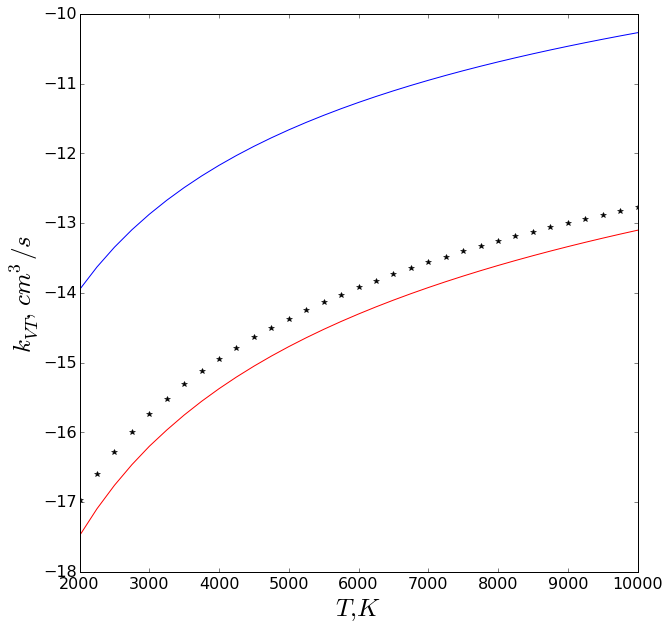

In [48]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(T_arr, np.log10(fho_vt * 10**6), 'r')
plt.plot(T_arr, np.log10(fho_vt_a * 10**6), 'k*')
plt.plot(T_arr, np.log10(fho_ssh * 10**6), 'b')
plt.tick_params(labelsize=16)
plt.xlabel(r'$T, K$', fontsize=25)
plt.ylabel(r'$k_{VT},\ cm^{3}/s$', fontsize=25)
plt.show()

In [43]:
fho_vv1 = fho_rates_vv(T_start, T_step, step_amt, id_N2N2, N2, 1, 0, -1)
fho_vv2 = fho_rates_vv(T_start, T_step, step_amt, id_N2N2, N2, 10, 10, -1)
fho_vv1h = fho_rates_vv(T_start, T_step, step_amt, id_N2N2, N2h, 1, 0, -1)
fho_vv2h = fho_rates_vv(T_start, T_step, step_amt, id_N2N2, N2h, 10, 10, -1)

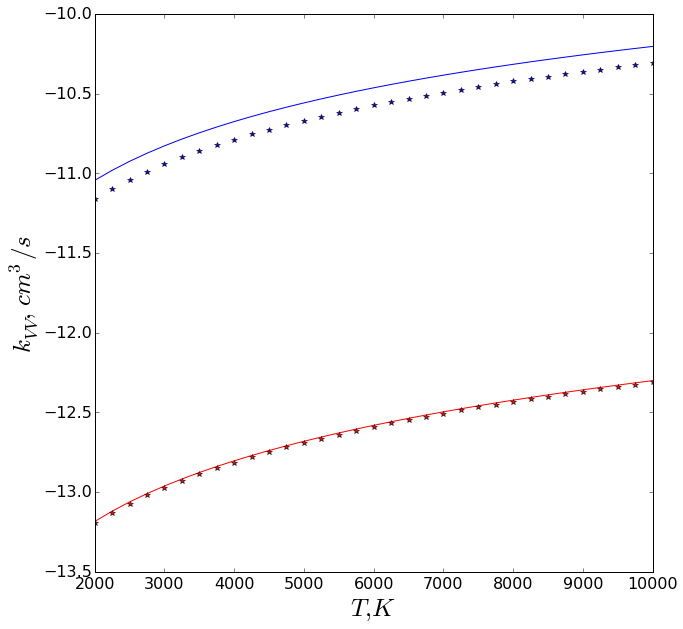

In [44]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(T_arr, np.log10(fho_vv1 * 10**6), 'r')
plt.plot(T_arr, np.log10(fho_vv2 * 10**6), 'b')
plt.plot(T_arr, np.log10(fho_vv1h * 10**6), 'r*')
plt.plot(T_arr, np.log10(fho_vv2h * 10**6), 'b*')
plt.tick_params(labelsize=16)
plt.xlabel(r'$T, K$', fontsize=25)
plt.ylabel(r'$k_{VV},\ cm^{3}/s$', fontsize=25)
plt.show()

In [70]:
lvl = 25
diss_rs = diss_rates_T_integral(T_start, T_step, step_amt, id_N2N, N2, lvl, 'RS')
diss_vss = diss_rates_T_integral(T_start, T_step, step_amt, id_N2N, N2, lvl, 'VSS')
diss_tm_d6k = diss_rates_T_TM(T_start, T_step, step_amt, dd_N2N, N2, lvl, 'D6k')
diss_tm_3T = diss_rates_T_TM(T_start, T_step, step_amt, dd_N2N, N2, lvl, '3T')

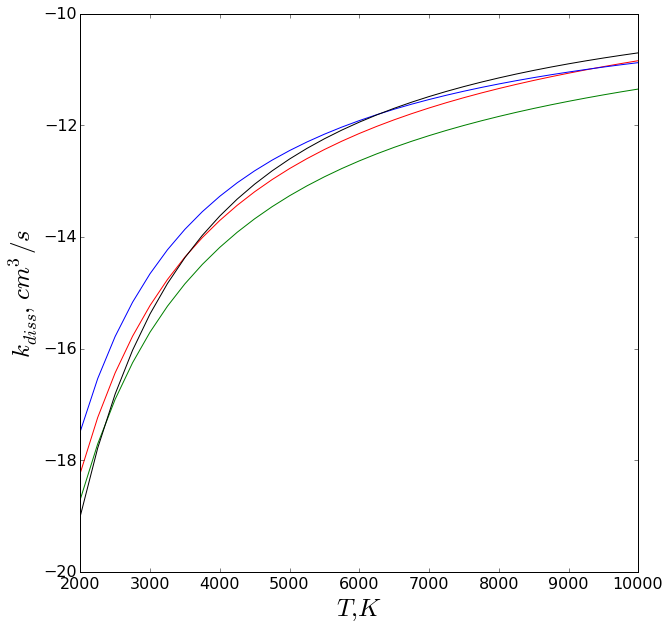

In [71]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(T_arr, np.log10(diss_rs * 10**6), 'r')
plt.plot(T_arr, np.log10(diss_vss * 10**6), 'g')
plt.plot(T_arr, np.log10(diss_tm_d6k * 10**6), 'b')
plt.plot(T_arr, np.log10(diss_tm_3T * 10**6), 'k')
plt.tick_params(labelsize=16)
plt.xlabel(r'$T, K$', fontsize=25)
plt.ylabel(r'$k_{diss},\ cm^{3}/s$', fontsize=25)
plt.show()

In [81]:
T_val = 6000.
diss_rs = diss_rates_i_integral(T_val, id_N2N, N2, 'RS')
diss_vss = diss_rates_i_integral(T_val, id_N2N, N2, 'VSS')
diss_tm_d6k = diss_rates_i_TM(T_val, dd_N2N, N2, 'D6k')
diss_tm_3T = diss_rates_i_TM(T_val, dd_N2N, N2, '3T')

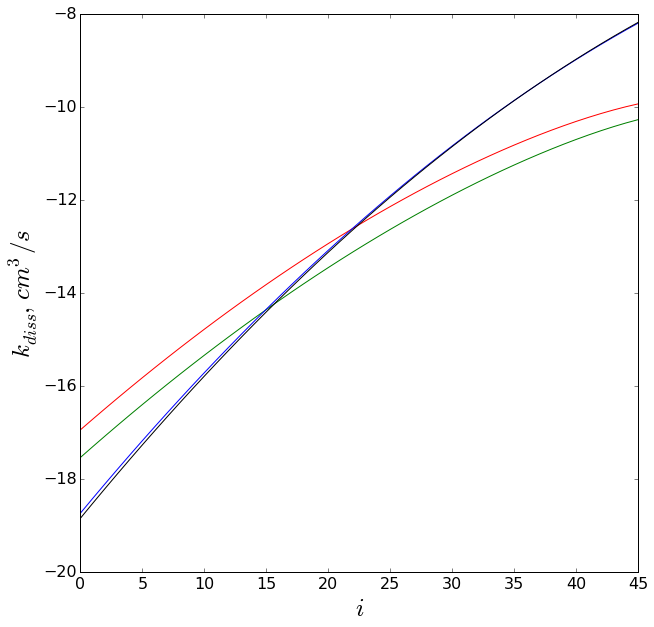

In [82]:
i_arr = np.array(list(range(N2.num_vibr+1)))
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(i_arr, np.log10(diss_rs * 10**6), 'r')
plt.plot(i_arr, np.log10(diss_vss * 10**6), 'g')
plt.plot(i_arr, np.log10(diss_tm_d6k * 10**6), 'b')
plt.plot(i_arr, np.log10(diss_tm_3T * 10**6), 'k')
plt.tick_params(labelsize=16)
plt.xlabel(r'$i$', fontsize=25)
plt.ylabel(r'$k_{diss},\ cm^{3}/s$', fontsize=25)
plt.show()

In [ ]:
#detailed balance
lvl1 = 40
lvl2 = 4
downdog = ratesvibr.vv_rate_fho(5000., id_N2N2, N2, N2, lvl1, lvl2, -1)
updog = ratesvibr.vv_rate_fho(5000., id_N2N2, N2, N2, lvl1-1, lvl2+1, 1)
testdog = updog * np.exp(-(N2.vibr[lvl1-1] + N2.vibr[lvl2+1] - N2.vibr[lvl1] - N2.vibr[lvl2]) / (constants.k * 5000.))
print(downdog, updog, testdog)